In [10]:
import itertools
from operator import itemgetter
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pickle
import random

In [6]:
random.sample(range(1, 1000000), 600000)

[676460,
 978156,
 419183,
 530301,
 778367,
 304241,
 927866,
 687629,
 621229,
 292913,
 659579,
 817811,
 800883,
 217246,
 646318,
 137686,
 579839,
 795075,
 367090,
 509644,
 600649,
 284988,
 238987,
 25019,
 844452,
 749711,
 475756,
 606409,
 63022,
 787408,
 547788,
 276971,
 963685,
 513259,
 856986,
 894861,
 357737,
 629776,
 797783,
 145101,
 655589,
 885591,
 872758,
 65806,
 550905,
 740019,
 158833,
 628899,
 454217,
 973264,
 960667,
 492005,
 681648,
 418133,
 332259,
 224869,
 449209,
 920376,
 107148,
 782726,
 585395,
 261371,
 603705,
 462355,
 782447,
 685745,
 146754,
 427331,
 381440,
 180663,
 430036,
 813133,
 192561,
 647453,
 138579,
 554017,
 370462,
 238650,
 736889,
 673042,
 272804,
 798877,
 702997,
 351278,
 180047,
 847372,
 593421,
 637087,
 458495,
 16782,
 329942,
 873510,
 671003,
 713449,
 59794,
 786253,
 348837,
 798874,
 68726,
 117961,
 791023,
 441663,
 8465,
 397160,
 868857,
 667265,
 346711,
 990568,
 2661,
 527903,
 506663,
 769237,
 8

In [2]:
%matplotlib inline

In [11]:
DIR = "./data/"

In [4]:
# num_lines = sum(1 for line in open(DIR + 'train.txt'))

In [5]:
# 60% of data ~ 650,000 lines

In [ ]:
# temp_data_1000 = []
# temp_data_5000 = []
# temp_data_10000 = []
# with open(DIR + 'train.txt', 'r') as train_data:
#     for line in itertools.islice(train_data, 0, 1000):
#         checked_line = eval(line)
#         temp_data_1000.append(checked_line)
# with open(DIR + 'train.txt', 'r') as train_data:
#     for line in itertools.islice(train_data, 0, 5000):
#         checked_line = eval(line)
#         temp_data_5000.append(checked_line)
# with open(DIR + 'train.txt', 'r') as train_data:
#     for line in itertools.islice(train_data, 0, 10000):
#         checked_line = eval(line)
#         temp_data_10000.append(checked_line)
# temp_data_15000 = []
# with open(DIR + 'train.txt', 'r') as train_data:
#     for line in itertools.islice(train_data, 0, 15000):
#         checked_line = eval(line)
#         temp_data_15000.append(checked_line)

In [4]:
def get_lines(limit):
    with open(DIR + 'train.txt', 'r') as train_data:
        for line in itertools.islice(train_data, 0, limit):
            yield line 

In [13]:
def random_line():
    line_num = 0
    selected_line = ''
    with open(DIR + 'train.txt', 'r') as f:
        while 1:
            line = f.readline()
            if not line: break
            line_num += 1
            if random.uniform(0, line_num) < 1:
                selected_line = line
    return selected_line.strip()

In [14]:
random_line()

KeyboardInterrupt: 

In [ ]:
num = 1
data_1 = [eval(line) for line in get_lines(num)]

In [35]:
with open('data_60.pickle', 'wb') as handle:
    pickle.dump(data_60, handle)

In [36]:
with open('100000_lines.pickle', 'rb') as handle:
    b = pickle.load(handle)
tmp == b

True

In [21]:
tmp_cutoff = [ii for ii in tmp if ii > 0 and ii <= 500]

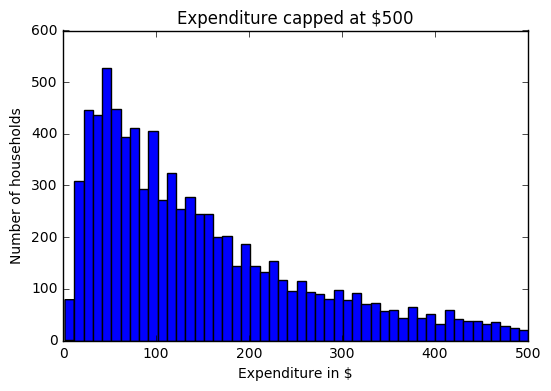

In [31]:
plt.hist(tmp_cutoff, bins=50)
plt.xlabel("Expenditure in $")
plt.ylabel("Number of households")
plt.title("Expenditure capped at $500")

Note to self : # total features remains the same

In [ ]:
for ii in sorted(temp_data, key=itemgetter(1), reverse=True):
    print(ii[0], ii[1])

In [ ]:
expenditure_1000 = [float(item[1]) for item in temp_data_1000 if float(item[1]) > 0.0]
expenditure_5000 = [float(item[1]) for item in temp_data_5000 if float(item[1]) > 0.0]
expenditure_10000 = [float(item[1]) for item in temp_data_10000 if float(item[1]) > 0.0]

In [ ]:
expenditure_15000 = [float(item[1]) for item in temp_data_15000 if float(item[1]) > 0.0]

In [ ]:
max(expenditure_10000)

In [ ]:
plt.hist(expenditure_15000, bins=50)

In [ ]:
sorted_feature_vals = [ss[1] for ss in sorted(temp_data[3][2][1], key=itemgetter(1), reverse=True)]

In [ ]:
Counter(sorted_feature_vals).most_common(20)

In [20]:
with open(DIR + 'train.txt', 'r') as train_data:
    for line in itertools.islice(train_data, 0, 20):
        d = toml.loads(str(line))

TomlDecodeError: Found invalid character in key name: ','. Try quoting the key name.